### Shopify Data Science Internship Test

By: Vedang Anand Waradpande

MS CS student at Rutgers University

Contact: +1 848 437 1822

Email: vedang.waradpande@gmail.com

#### Solution

Q1.
   
a. There are several outliers in the data where the order price is much higher than the general range that order amounts fall into (about 90 to 1000).

The value `3145.13` is the mean of all orders in the month, which is highly skewed because of the outliers.

b. There are much better ways to calculate the AOV. For e.g.:

- Median of median of each shop
- By removing the outliers in the following ways:
    * Remove outliers over the 99th percentile and below the 1st percentile ($\mu \pm 3\sigma$)
    * Don't consider shops with very high order amounts in general
    * Don't consider users with very high order amounts in general
    
The best metric would be median of median of each shop

c. The value of the best metric is `306.0`.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.shape

(5000, 7)

In [100]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'].min(), df['created_at'].max()

(Timestamp('2017-03-01 00:08:09'), Timestamp('2017-03-30 23:55:35'))

In [101]:
df.groupby('shop_id').agg({'order_amount': 'mean'})['order_amount'].mean()

3136.834087887025

In [102]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [103]:
df['order_amount'].quantile(q=[0.75, 0.80, 0.90, 0.925, 0.95, 0.975, 0.98, 0.985, 0.99, 0.999, 1.0])

0.750       390.00
0.800       444.00
0.900       531.00
0.925       568.00
0.950       640.00
0.975       760.00
0.980       800.08
0.985       948.18
0.990     25725.00
0.999    704000.00
1.000    704000.00
Name: order_amount, dtype: float64

The idea in the next few cells is that we can try to remove credit cards as well because the mean amount in credit cards is very high. However, this is not feasible because credit cards constitute roughly 34.7% of the order traffic.

In [104]:
df.groupby('payment_method').agg({'order_amount': 'mean'})

,order_amount
payment_method,
cash,730.353199
credit_card,7461.594813
debit,966.840215


In [115]:
df['payment_method'].value_counts(normalize=True)

credit_card    0.3470
debit          0.3342
cash           0.3188
Name: payment_method, dtype: float64

#### Mean of medians of shops

In [114]:
df.groupby('shop_id').agg({'order_amount': 'median'})['order_amount'].median()

306.0

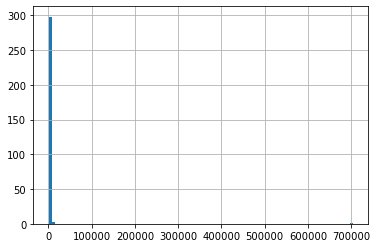

In [107]:
df.groupby('user_id').agg({'order_amount': 'mean'})['order_amount'].hist(bins=100)
plt.show()

In [110]:
df['order_amount'].quantile([0.01, 0.99])

0.01      101.0
0.99    25725.0
Name: order_amount, dtype: float64

#### Mean after outlier removal

In [113]:
first_quantile = df['order_amount'].quantile([0.01, 0.99])[0.01]
ninety_ninth_quantile = df['order_amount'].quantile([0.01, 0.99])[0.99]

df[(df['order_amount'] > first_quantile) & (df['order_amount'] < ninety_ninth_quantile)]['order_amount'].mean()

305.0532896085263